<a href="https://colab.research.google.com/github/muhnasih/PCVK_GANJIL_2025/blob/main/casemethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Lokasi folder gambar di Google Drive
image_folder = '/content/drive/MyDrive/Image'  # ubah jika berbeda
images = ['gelap.jpeg', 'face2.jpeg', 'face3.jpeg']

# Fungsi bantu
def show_image(title, image):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

def show_histogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Intensitas")
    plt.ylabel("Jumlah Piksel")
    plt.hist(image.ravel(), bins=256, range=[0,256], color='gray')
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Berhasil: gelap.jpeg


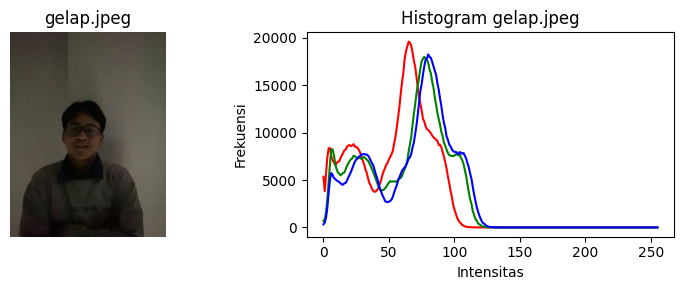

Berhasil: face2.jpeg


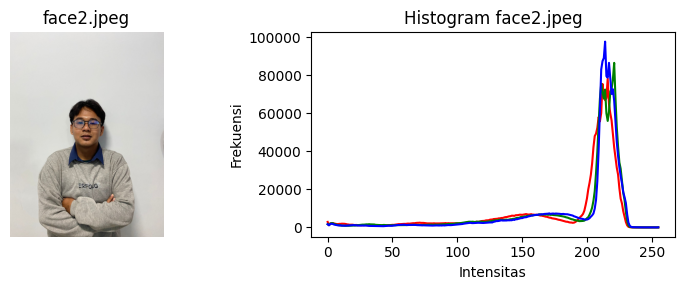

Berhasil: face3.jpeg


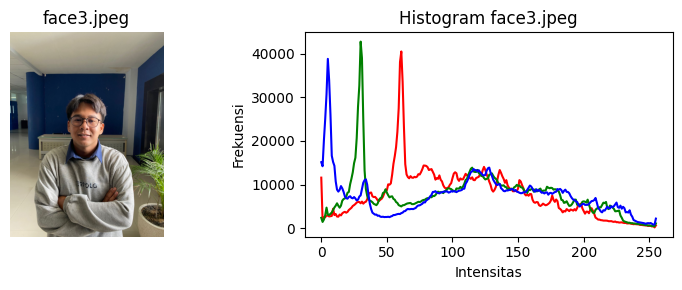

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def show_image_and_histogram(title, image):
    # Konversi BGR → RGB untuk tampilan yang benar
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar dan histogram dalam satu figure
    plt.figure(figsize=(8, 3))

    # Tampilan gambar
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')

    # Tampilan histogram RGB
    plt.subplot(1, 2, 2)
    for i, col in enumerate(('r', 'g', 'b')):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(f"Histogram {title}")
    plt.xlabel('Intensitas')
    plt.ylabel('Frekuensi')

    plt.tight_layout()
    plt.show()

# === Bagian 1 – Histogram dan Analisis Distribusi Intensitas ===
faces = []

for name in images:
    path = os.path.join(image_folder, name)
    img = cv2.imread(path, cv2.IMREAD_COLOR)

    if img is not None:
        print(f"Berhasil: {name}")
        faces.append(img)
        show_image_and_histogram(name, img)
    else:
        print(f"Gagal: {name}")


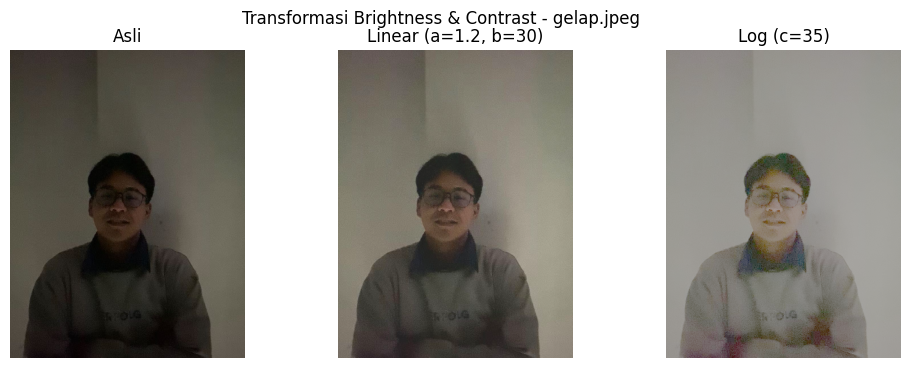

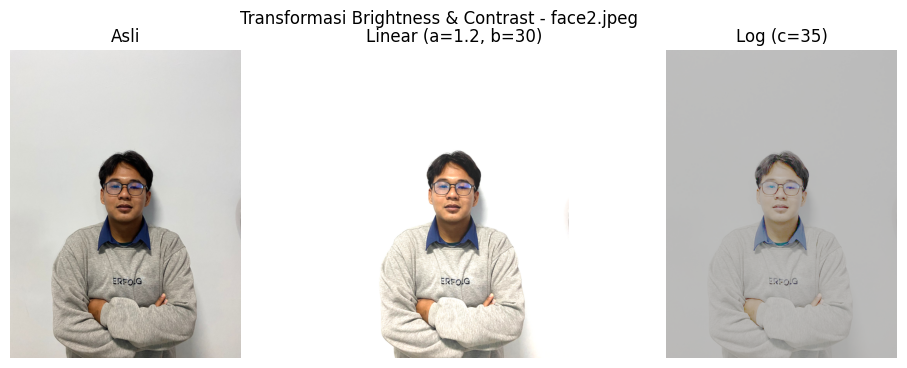

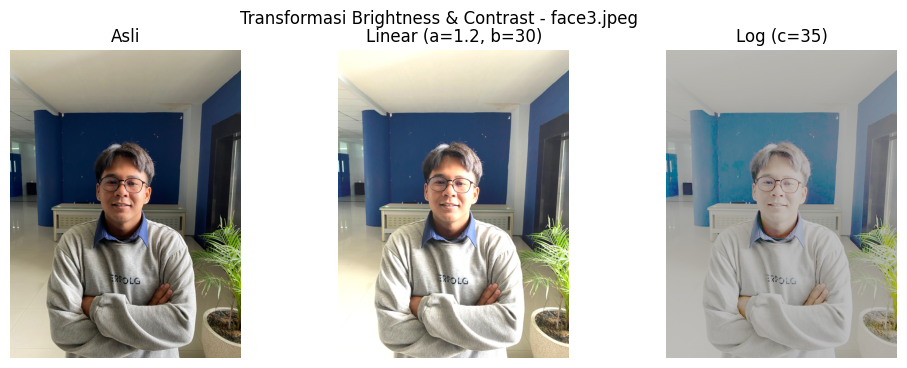

In [ ]:
# === Bagian 2 – Transformasi Brightness dan Contrast (RGB) ===
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Lokasi folder gambar
folder = '/content/drive/MyDrive/Image'
gambar = ['gelap.jpeg', 'face2.jpeg', 'face3.jpeg']

# Fungsi linear brightness & contrast
def linear_bc(img, b=30, a=1.2):
    # g(x,y) = a*f(x,y) + b
    return cv2.convertScaleAbs(img, alpha=a, beta=b)

# Fungsi log brightness
def log_bright(img, c=35):
    # g(x,y) = c * log(1 + f(x,y))
    hasil = c * np.log1p(img.astype(np.float32))
    return np.clip(hasil, 0, 255).astype(np.uint8)

# Loop untuk menampilkan hasil
for name in gambar:
    path = os.path.join(folder, name)
    img = cv2.imread(path)

    if img is None:
        print(f"Gagal baca {name}")
        continue

    lin = linear_bc(img, b=30, a=1.2)
    log = log_bright(img, c=35)

    plt.figure(figsize=(12,4))
    plt.suptitle(f"Transformasi Brightness & Contrast - {name}")

    plt.subplot(1,3,1)
    plt.title("Asli")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Linear (a=1.2, b=30)")
    plt.imshow(cv2.cvtColor(lin, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Log (c=35)")
    plt.imshow(cv2.cvtColor(log, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


/tmp/ipython-input-4230525198.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0,256], color='black')
/tmp/ipython-input-4230525198.py:43: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(eq.ravel(), 256, [0,256], color='black')


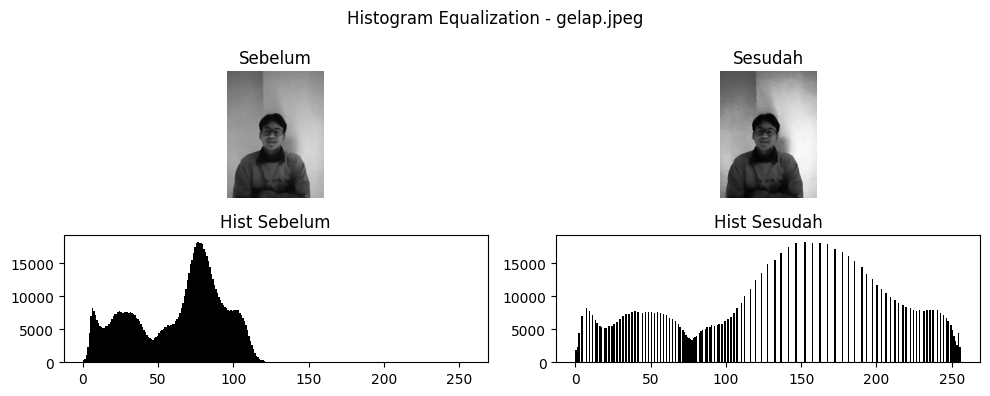

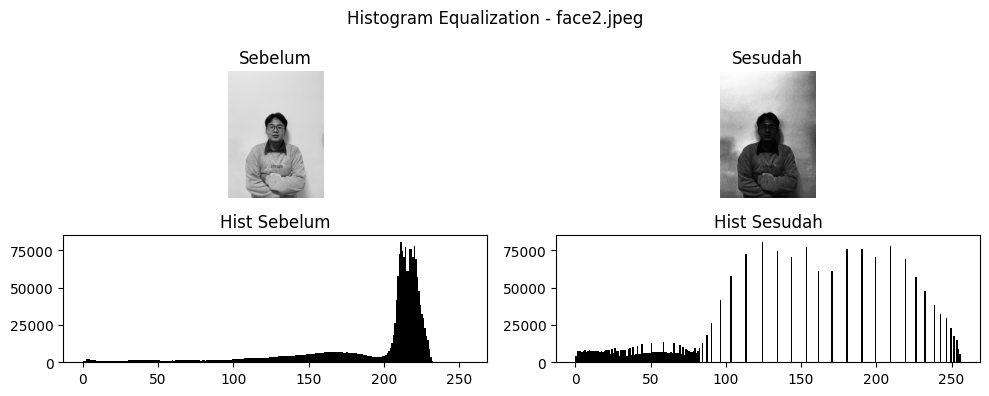

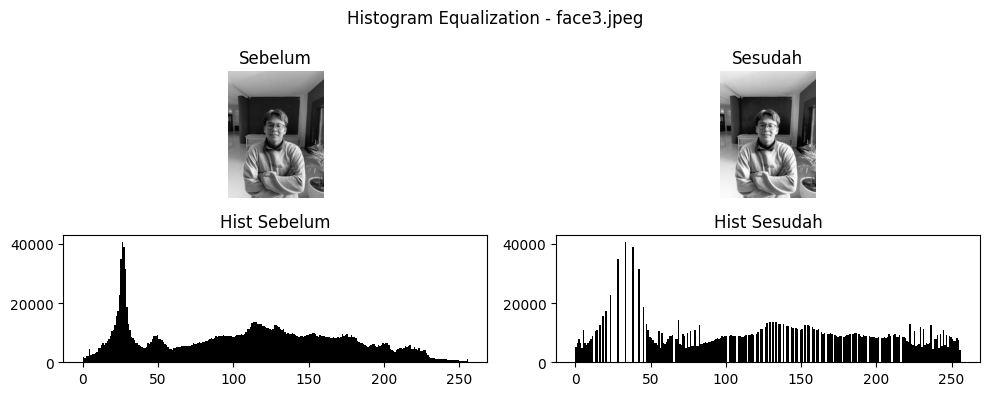

In [ ]:
# Bagian 3 – Histogram Equalization
import cv2
import matplotlib.pyplot as plt
import os

folder = '/content/drive/MyDrive/Image'
gambar = ['gelap.jpeg', 'face2.jpeg', 'face3.jpeg']

for nama in gambar:
    path = os.path.join(folder, nama)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print('gagal buka', nama)
        continue

    # proses equalization
    eq = cv2.equalizeHist(img)

    # tampilkan hasil dan histogramnya
    plt.figure(figsize=(10,4))
    plt.suptitle('Histogram Equalization - ' + nama)

    # sebelum
    plt.subplot(2,2,1)
    plt.title('Sebelum')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # sesudah
    plt.subplot(2,2,2)
    plt.title('Sesudah')
    plt.imshow(eq, cmap='gray')
    plt.axis('off')

    # histogram sebelum
    plt.subplot(2,2,3)
    plt.title('Hist Sebelum')
    plt.hist(img.ravel(), 256, [0,256], color='black')

    # histogram sesudah
    plt.subplot(2,2,4)
    plt.title('Hist Sesudah')
    plt.hist(eq.ravel(), 256, [0,256], color='black')

    plt.tight_layout()
    plt.show()


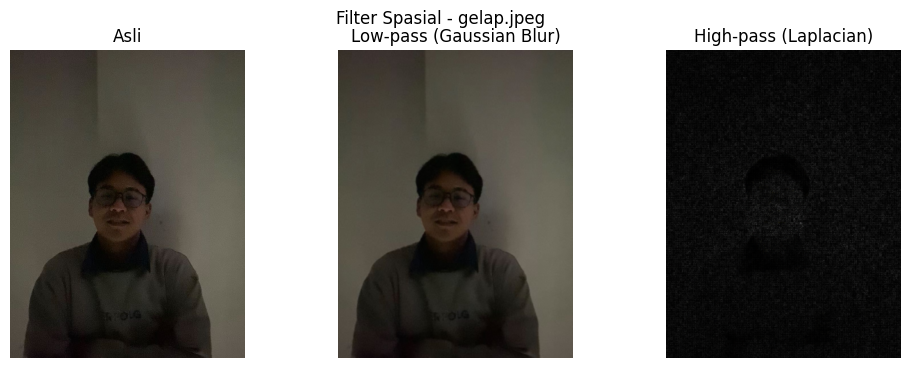

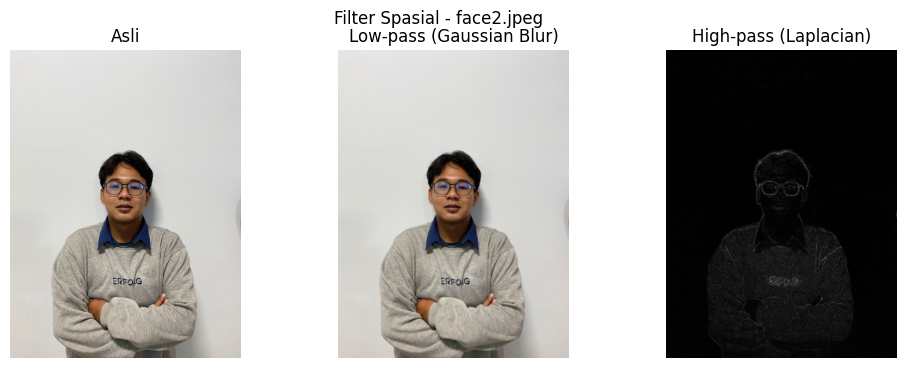

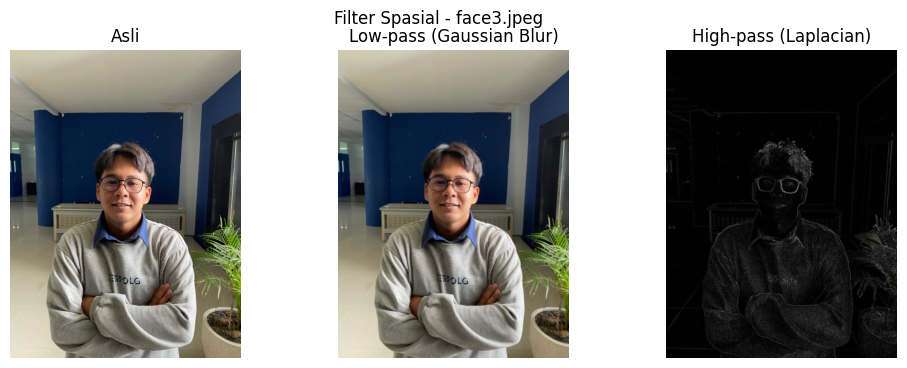

In [ ]:
# === Bagian 4 – Filter Spasial (Low-pass & High-pass) ===
import cv2
import matplotlib.pyplot as plt
import os

# Folder gambar
folder = '/content/drive/MyDrive/Image'
gambar = ['gelap.jpeg', 'face2.jpeg', 'face3.jpeg']

for name in gambar:
    path = os.path.join(folder, name)
    img = cv2.imread(path)

    if img is None:
        print(f"Gagal baca {name}")
        continue

    # Ubah ke RGB biar warna tampil benar
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Low-pass filter (Gaussian Blur)
    low = cv2.GaussianBlur(img_rgb, (7,7), 0)

    # High-pass filter (Laplacian)
    lap = cv2.Laplacian(img_rgb, cv2.CV_64F)
    lap = cv2.convertScaleAbs(lap)

    # Tampilkan hasil berdampingan
    plt.figure(figsize=(12,4))
    plt.suptitle(f"Filter Spasial - {name}")

    plt.subplot(1,3,1)
    plt.title("Asli")
    plt.imshow(img_rgb)
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Low-pass (Gaussian Blur)")
    plt.imshow(low)
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("High-pass (Laplacian)")
    plt.imshow(lap)
    plt.axis('off')

    plt.show()


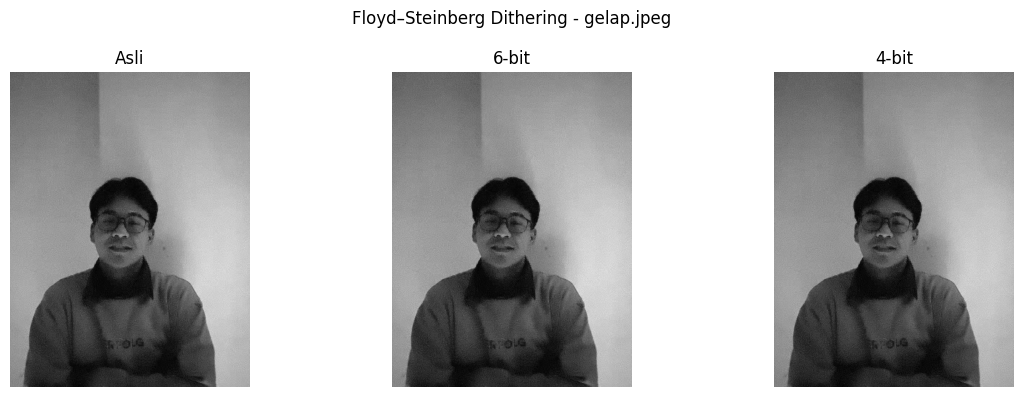

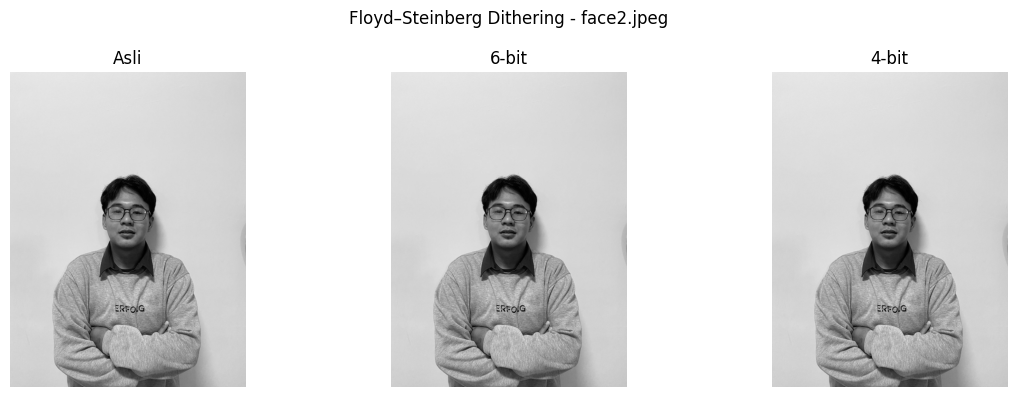

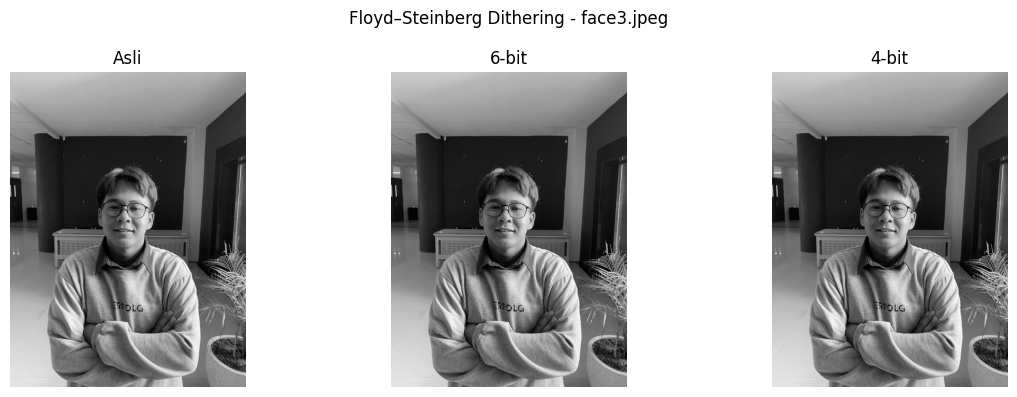

In [ ]:
# Bagian 5 – Floyd–Steinberg Dithering
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Fungsi dithering
def floyd_steinberg_dithering(img, bit_depth=4):
    gray = img.astype(np.float32) / 255.0
    h, w = gray.shape
    level = 2 ** bit_depth

    for y in range(h - 1):
        for x in range(1, w - 1):
            old = gray[y, x]
            new = round(old * (level - 1)) / (level - 1)
            gray[y, x] = new
            err = old - new

            # Sebar error ke tetangga
            gray[y, x + 1] += err * 7/16
            gray[y + 1, x - 1] += err * 3/16
            gray[y + 1, x] += err * 5/16
            gray[y + 1, x + 1] += err * 1/16

    gray = np.clip(gray, 0, 1)
    return (gray * 255).astype(np.uint8)

# Folder dan gambar
folder = '/content/drive/MyDrive/Image'
gambar = ['gelap.jpeg', 'face2.jpeg', 'face3.jpeg']

for nama in gambar:
    path = os.path.join(folder, nama)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print('gagal buka', nama)
        continue

    # Hasil dithering 6-bit & 4-bit
    dith6 = floyd_steinberg_dithering(img, bit_depth=6)
    dith4 = floyd_steinberg_dithering(img, bit_depth=4)

    # Tampilkan hasil berdampingan
    plt.figure(figsize=(12,4))
    plt.suptitle('Floyd–Steinberg Dithering - ' + nama)

    plt.subplot(1,3,1)
    plt.title('Asli')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title('6-bit')
    plt.imshow(dith6, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title('4-bit')
    plt.imshow(dith4, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


Bagian B – Analisis






Jawablah dalam bentuk narasi atau tabel analisis singkat:
1. Bagaimana perubahan nilai brightness dan contrast memengaruhi hasil histogram wajah
gelap?
 - Pada gambar gelap.jpeg, tingkat kecerahan rendah sehingga wajah tampak gelap dan detail kurang terlihat. Histogram terkonsentrasi di sisi kiri (intensitas 0–120), menandakan gambar underexposed dengan kontras rendah.

 - Pada gambar face2.jpeg, peningkatan brightness membuat wajah tampak sangat terang. Histogram bergeser ke kanan (150–255), menandakan gambar overexposed, di mana detail pada area terang banyak hilang meskipun kontras meningkat.

-  Sedangkan pada face3.jpeg, distribusi intensitas menyebar merata dari 0 hingga 230. Gambar terlihat seimbang, detail wajah dan latar jelas, serta tidak terlalu gelap maupun terang. Hasil ini menunjukkan pencahayaan dan kontras paling ideal dibanding dua gambar sebelumnya.

2. Apakah histogram equalization selalu memperbaiki detail wajah? Jelaskan alasannya dengan contoh hasil Anda.

Histogram equalization tidak selalu memperbaiki detail wajah, karena hasilnya tergantung pada kondisi awal pencahayaan dan distribusi intensitas gambar.
Karena Histogram equalization bekerja dengan menyebarkan nilai intensitas piksel agar merata dari gelap ke terang, sehingga kontras keseluruhan meningkat.
Namun, pada gambar wajah, peningkatan kontras tidak selalu berarti peningkatan detail yang bermanfaat.
3. Bandingkan hasil low-pass dan high-pass filter pada area wajah — bagian mana yang paling
terpengaruh?
4. Mengapa proses dithering bisa mempertegas atau justru mengaburkan ekspresi wajah?
5. Berdasarkan hasil percobaan Anda, kombinasi teknik mana yang paling efektif untuk
meningkatkan readability fitur wajah sebelum tahap deteksi?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


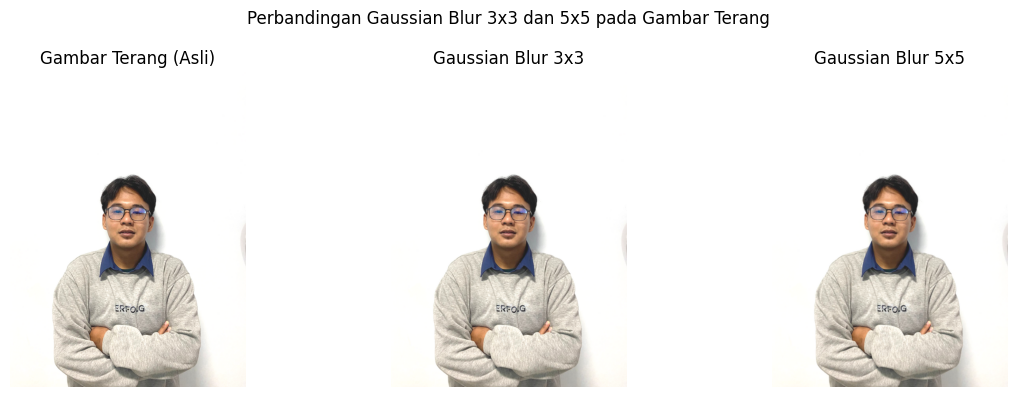

=== Nilai PSNR (banding dengan gambar terang) ===
Gaussian 3x3 : 38.03 dB
Gaussian 5x5 : 35.07 dB


In [35]:
# === Percobaan: Perbandingan Gaussian Blur 3x3 & 5x5 ===
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar dan ubah ke RGB
img = cv2.imread('/content/drive/MyDrive/Image/face2.jpeg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Tingkatkan brightness sedikit biar wajah lebih jelas
bright = cv2.convertScaleAbs(rgb, alpha=1.1, beta=30)

# 3. Terapkan Gaussian Blur dengan dua ukuran kernel
gauss3 = cv2.GaussianBlur(bright, (3,3), 0)
gauss5 = cv2.GaussianBlur(bright, (5,5), 0)

# 4. Tampilkan hasil perbandingan berdampingan
plt.figure(figsize=(12,4))
plt.suptitle("Perbandingan Gaussian Blur 3x3 dan 5x5 pada Gambar Terang")

plt.subplot(1,3,1)
plt.imshow(bright)
plt.title("Gambar Terang (Asli)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gauss3)
plt.title("Gaussian Blur 3x3")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gauss5)
plt.title("Gaussian Blur 5x5")
plt.axis('off')

plt.tight_layout()
plt.show()

# 5. Hitung PSNR untuk perbandingan
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0: return 100
    return 20 * np.log10(255.0 / np.sqrt(mse))

print("=== Nilai PSNR (banding dengan gambar terang) ===")
print("Gaussian 3x3 :", round(psnr(bright, gauss3), 2), "dB")
print("Gaussian 5x5 :", round(psnr(bright, gauss5), 2), "dB")


Bagian D – Analisis Akhir & Kesimpulan

